**Preamble**

This is a **group** project. Please indicate the names of all group members below.
Each group is to comprise *five* to *seven* members.

If the group obtains a solution through research (e.g., on the web) or chatting with generative AI, then the group **must acknowledge the source**, but *write up ONE solution in their OWN WORDS*. To be clear, the group should submit ONE notebook.

Names
- 1. Zhong Hao
- 2. Wen Xingdi
- 3.
- 4.
- 5.
- 6.
- 7.

Sources (if applicable):  


In [1]:
# Marks
# DO NOT CHANGE THIS

parts    = ['(a) ', '(b) ', '(c) ']
score    = [0,0,0]
maxscore = [3,3,9]

numparts = len(parts)

for i in range(numparts):
    print("score for {}: {} out of {}".format(parts[i], score[i], maxscore[i]))
print()
print("total score   : {} out of {}".format(sum(score),sum(maxscore)))

score for (a) : 0 out of 3
score for (b) : 0 out of 3
score for (c) : 0 out of 9

total score   : 0 out of 15


# Traveling Salesperson Problem (TSP)

Project objectives:

i. Using PuLP, branch-and-bound and 'subtour constraints' techniques, implement routines to solve small TSP instances.

ii. By modifying the routines, obtain tight estimates on one moderate TSP instances.

---
## Branch-and-Bound

**(a) (3 marks)**

**(a.i)** Implement a routine in PuLP that solves a TSP-LP relaxation problem that *fixes the values of certain variables*.

Specifically, your routine should take as

**inputs:**

- a list of `cities`,
- a distance dictionary `dist`,
- a list of roads `R0` whose values are fixed to be *zero* in the solution,
- a list of roads `R1` whose values are fixed to be *one* in the solution.

and **output** the solution to the following linear program:

$$
\begin{array}{crcll}
\min &\sum_{i<j} c_{ij}x_{ij}  \\
\text{subject to}
& \sum_{j<i}x_{ji} + \sum_{i<j}x_{ij} & = 2 &\text{ for each city }i\\
& x_{ij} & =0 & \text{ for each road }(i,j)\in R_0\\
& x_{ij} & =1 & \text{ for each road }(i,j)\in R_1\\
& x_{ij}\text{'s} & \ge 0\\
\end{array}
$$


**Notes**:
- <font color='red'>You are **NOT** to set the variable category to `cat='Integer'` nor  `cat='Binary'`.</font>
- Your routine should return the value `20` for the following instance.


In [2]:
# define the list of cities
cities = [1,2,3,4,5,6]

# define the distance between each pair of cities
dist = {
               (1,2): 4, (1,3): 3,  (1,4): 7, (1,5): 7, (1,6): 6,
    (2,1): 4,            (2,3): 2,  (2,4): 5, (2,5): 7, (2,6): 7,
    (3,1): 3,  (3,2): 2,            (3,4): 8, (3,5): 6, (3,6): 6,
    (4,1): 7,  (4,2): 5, (4,3): 8,            (4,5): 3, (4,6): 5,
    (5,1): 7,  (5,2): 7, (5,3): 6,  (5,4): 3,           (5,6): 3, 
    (6,1): 6,  (6,2): 7, (6,3): 6,  (6,4): 5, (6,5): 3,
}

# roads to be fixed to zero (R0) and one (R1)
R0 = [(1,6)]
R1 = [(1,2)]

In [3]:
import pulp

# create a linear programming problem instance with the objective to minimise
prob = pulp.LpProblem("a(i)", pulp.LpMinimize)

# create decision variables x_{i,j} for each pair of cities where i != j
# Variables are continuous between 0 and 1 since it's an LP relaxation.
x = {
    (i, j): pulp.LpVariable(name=f"x_{i}_{j}", lowBound=0, upBound=1)
    for i in cities for j in cities if i != j
}

# objective function: minimise the total distance traveled
prob += pulp.lpSum(dist[i, j] * x[i, j] for (i, j) in dist)

# Degree constraints: Each city must have exactly two edges (degree of 2).
for i in cities:
    prob += (
        pulp.lpSum(x[j, i] for j in cities if (j, i) in x) +
        pulp.lpSum(x[i, j] for j in cities if (i, j) in x)
    ) == 2, f"Degree_{i}"

# fix variables in R0 to 0 (edges that must not be in the solution)
for road in R0:
    prob += x[road] == 0, f"Fix_{road}_to_0"

# fix variables in R1 to 1 (edges that must be in the solution)
for road in R1:
    prob += x[road] == 1, f"Fix_{road}_to_1"

# solve the LP problem using the default solver
prob.solve()

# retrieve and print the optimal value of the objective function
optimal_value = pulp.value(prob.objective)
print("Optimal value:", optimal_value)

Optimal value: 20.0


In [4]:
# retrieve and print the variables that are equal to 1 in the optimal solution
print("Optimal solution:")
for var in prob.variables():
    if var.varValue == 1:
        print(f"{var.name} = {var.varValue}")

Optimal solution:
x_1_2 = 1.0
x_1_3 = 1.0
x_2_3 = 1.0
x_4_5 = 1.0
x_4_6 = 1.0
x_5_6 = 1.0


**(a.ii)** Using the routine in (a.i), apply Branch-and-Bound techniques to solve the following TSP instance on six cities.

**Notes**:
- <font color='red'>You are **NOT** to set the variable category to `cat='Integer'` nor  `cat='Binary'`.</font>
- To demonstrate your solution, you only need to *display the Branch-and-Bound tree*. For each node, you need to show the following information.
    - The optimal value of the LP-relaxation.
    - The optimal solution of the LP-relaxation.
    - If you bound at the node, why you bound.
    - If you branch at the node, the labels of the branches.
- You need **not** automate the process of branch-and-bound. However, you are required to plot / draw the branch-and-bound tree. _Here, you can plot using `Pyplot` or some simple drawing software, like powerpoint, or simply draw by hand._ You can supplement your diagram with the steps to build the tree.
- The shortest TSP tour has length **22**.

In [5]:
# define the list of cities
cities = [1,2,3,4,5,6]

# define the distances between each pair of cities
dist = {
               (1,2): 4, (1,3): 3,  (1,4): 7, (1,5): 7, (1,6): 6,
    (2,1): 4,            (2,3): 2,  (2,4): 5, (2,5): 7, (2,6): 7,
    (3,1): 3,  (3,2): 2,            (3,4): 8, (3,5): 6, (3,6): 6,
    (4,1): 7,  (4,2): 5, (4,3): 8,            (4,5): 3, (4,6): 5,
    (5,1): 7,  (5,2): 7, (5,3): 6,  (5,4): 3,           (5,6): 3, 
    (6,1): 6,  (6,2): 7, (6,3): 6,  (6,4): 5, (6,5): 3,
}

import pulp

# WRITE YOUR CODE HERE
# create a linear programming problem instance with the objective to minimise
prob=pulp.LpProblem("a(ii)",pulp.LpMinimize)

# create decision variables x_{i,j} for each pair of cities where i != j
# Variables are continuous between 0 and 1 since it's an LP relaxation.
x = { (i, j): pulp.LpVariable(name=f"x_{i}_{j}", lowBound=0, upBound=1) for i in cities for j in cities if i != j }

# objective function: minimise the total distance traveled
prob+=pulp.lpSum(dist[i]*x[i] for i in dist)

# degree constraints: Each city must have exactly two edges (degree of 2).
for i in cities:
    prob+=pulp.lpSum(x[(j,i)] for j in cities if j<i)+pulp.lpSum(x[(i,j)] for j in cities if j>i)==2

# Fix variables to 0 means edges that must not be in the solution.
# Fix variables to 1 means edges that must be in the solution.
prob+=x[(1,2)]==0
prob+=x[(1,3)]==1
prob+=x[(2,3)]==1
prob+=x[(4,5)]==1
prob+=x[(4,6)]==0
prob+=x[(5,6)]==1

# solve the LP problem using the default solver
prob.solve()

# retrieve and print the optimal value of the objective function
optimal_value=pulp.value(prob.objective)
print("Optimal value:",optimal_value)

for var in prob.variables():
    if var.varValue == 1:
        print(var.name, "=", var.varValue)

Optimal value: 22.0
x_1_3 = 1.0
x_1_6 = 1.0
x_2_3 = 1.0
x_2_4 = 1.0
x_4_5 = 1.0
x_5_6 = 1.0


Use matplotlib to plot the tree:

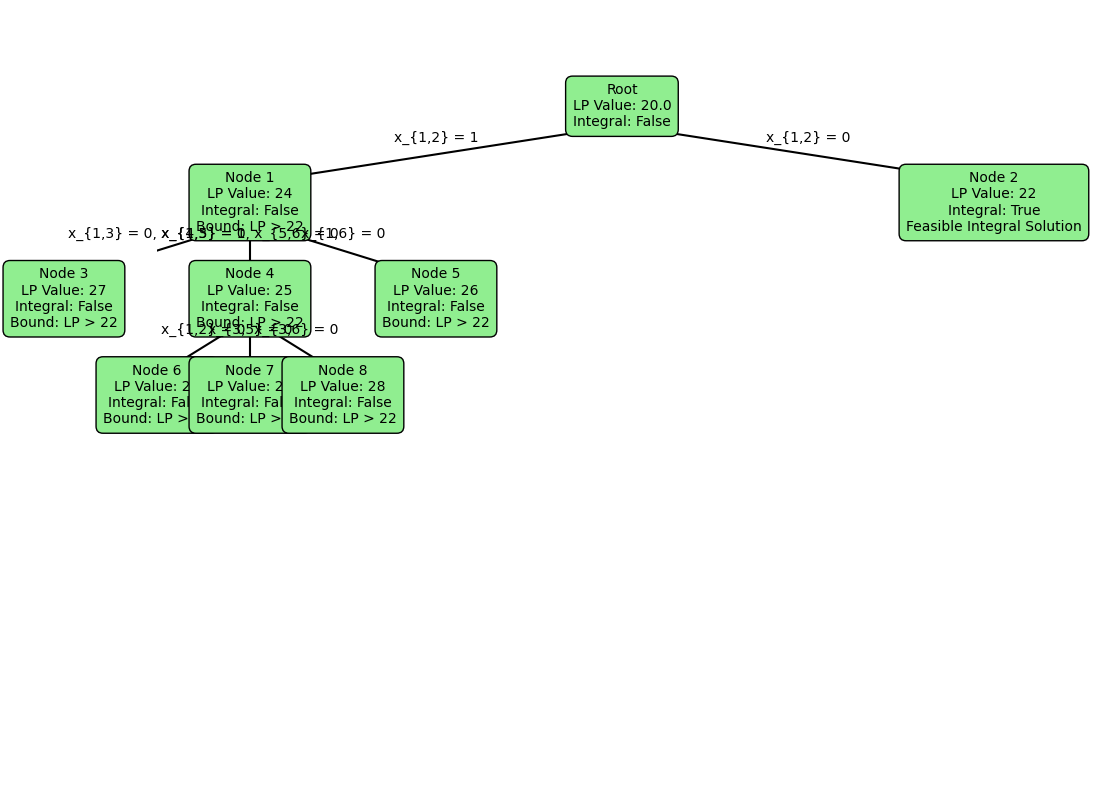

In [6]:
import matplotlib.pyplot as plt

# define the TreeNode class to represent nodes in the Branch-and-Bound tree
class TreeNode:
    def __init__(self, name, lp_value, solution, is_integral, bound_reason=None, branches=None):
        self.name = name
        self.lp_value = lp_value
        self.solution = solution
        self.is_integral = is_integral
        self.bound_reason = bound_reason
        self.branches = branches or []

# manually construct the Branch-and-Bound tree nodes
root_node = TreeNode('Root', 20.0, {}, False)

# level 1 nodes
node_1 = TreeNode('Node 1', 24, {}, False, "Bound: LP > 22")
node_2 = TreeNode('Node 2', 22, {}, True, "Feasible Integral Solution")

# level 2 nodes from Node 1
node_3 = TreeNode('Node 3', 27, {}, False, "Bound: LP > 22")
node_4 = TreeNode('Node 4', 25, {}, False, "Bound: LP > 22")
node_5 = TreeNode('Node 5', 26, {}, False, "Bound: LP > 22")

# level 3 nodes from Node 4
node_6 = TreeNode('Node 6', 26, {}, False, "Bound: LP > 22")
node_7 = TreeNode('Node 7', 24, {}, False, "Bound: LP > 22")
node_8 = TreeNode('Node 8', 28, {}, False, "Bound: LP > 22")

# branches
root_node.branches = [node_1, node_2]
node_1.branches = [node_3, node_4, node_5]
node_4.branches = [node_6, node_7, node_8]

# visualise the tree
def plot_node(node, x, y, dx):
    # Prepare node text
    node_text = f"{node.name}\nLP Value: {node.lp_value}"
    if node.is_integral:
        node_text += "\nIntegral: True"
    else:
        node_text += "\nIntegral: False"
    if node.bound_reason:
        node_text += f"\n{node.bound_reason}"

    # plot the node
    ax.text(x, y, node_text, ha='center', va='center',
            bbox=dict(boxstyle="round,pad=0.5", fc="lightgreen", ec="black", lw=1))

    # plot branches and child nodes
    if node.branches:
        num_branches = len(node.branches)
        child_y = y - 1  # vertical distance to child node

        for i, child in enumerate(node.branches):
            # determine child x position
            if num_branches == 1:
                child_x = x
            else:
                child_x = x - dx + i * (2 * dx) / (num_branches - 1)

            # draw a line to the child node
            ax.plot([x, child_x], [y - 0.2, child_y + 0.2], 'k-')

            # plot the branch label
            branch_label = ''
            if node == root_node and child == node_1:
                branch_label = 'x_{1,2} = 1'
            elif node == root_node and child == node_2:
                branch_label = 'x_{1,2} = 0'
            elif node == node_1 and child == node_3:
                branch_label = 'x_{1,3} = 0, x_{4,5} = 0'
            elif node == node_1 and child == node_4:
                branch_label = 'x_{1,3} = 1, x_{5,6} = 0'
            elif node == node_1 and child == node_5:
                branch_label = 'x_{1,6} = 0'
            elif node == node_4 and child == node_6:
                branch_label = 'x_{1,2} = 0'
            elif node == node_4 and child == node_7:
                branch_label = 'x_{3,5} = 0'
            elif node == node_4 and child == node_8:
                branch_label = 'x_{3,6} = 0'

            ax.text((x + child_x) / 2, (y + child_y) / 2 + 0.1, branch_label,
                    ha='center', va='bottom')

            # recursively plot the child node
            plot_node(child, child_x, child_y, dx / 2)

# create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(12, 10))

# plot the root node
plot_node(root_node, x=0.5, y=3, dx=0.4)

# adjust plot limits and hide axes
ax.set_xlim(0, 1)
ax.set_ylim(-4, 4)
ax.axis('off')

# display the plot
plt.show()

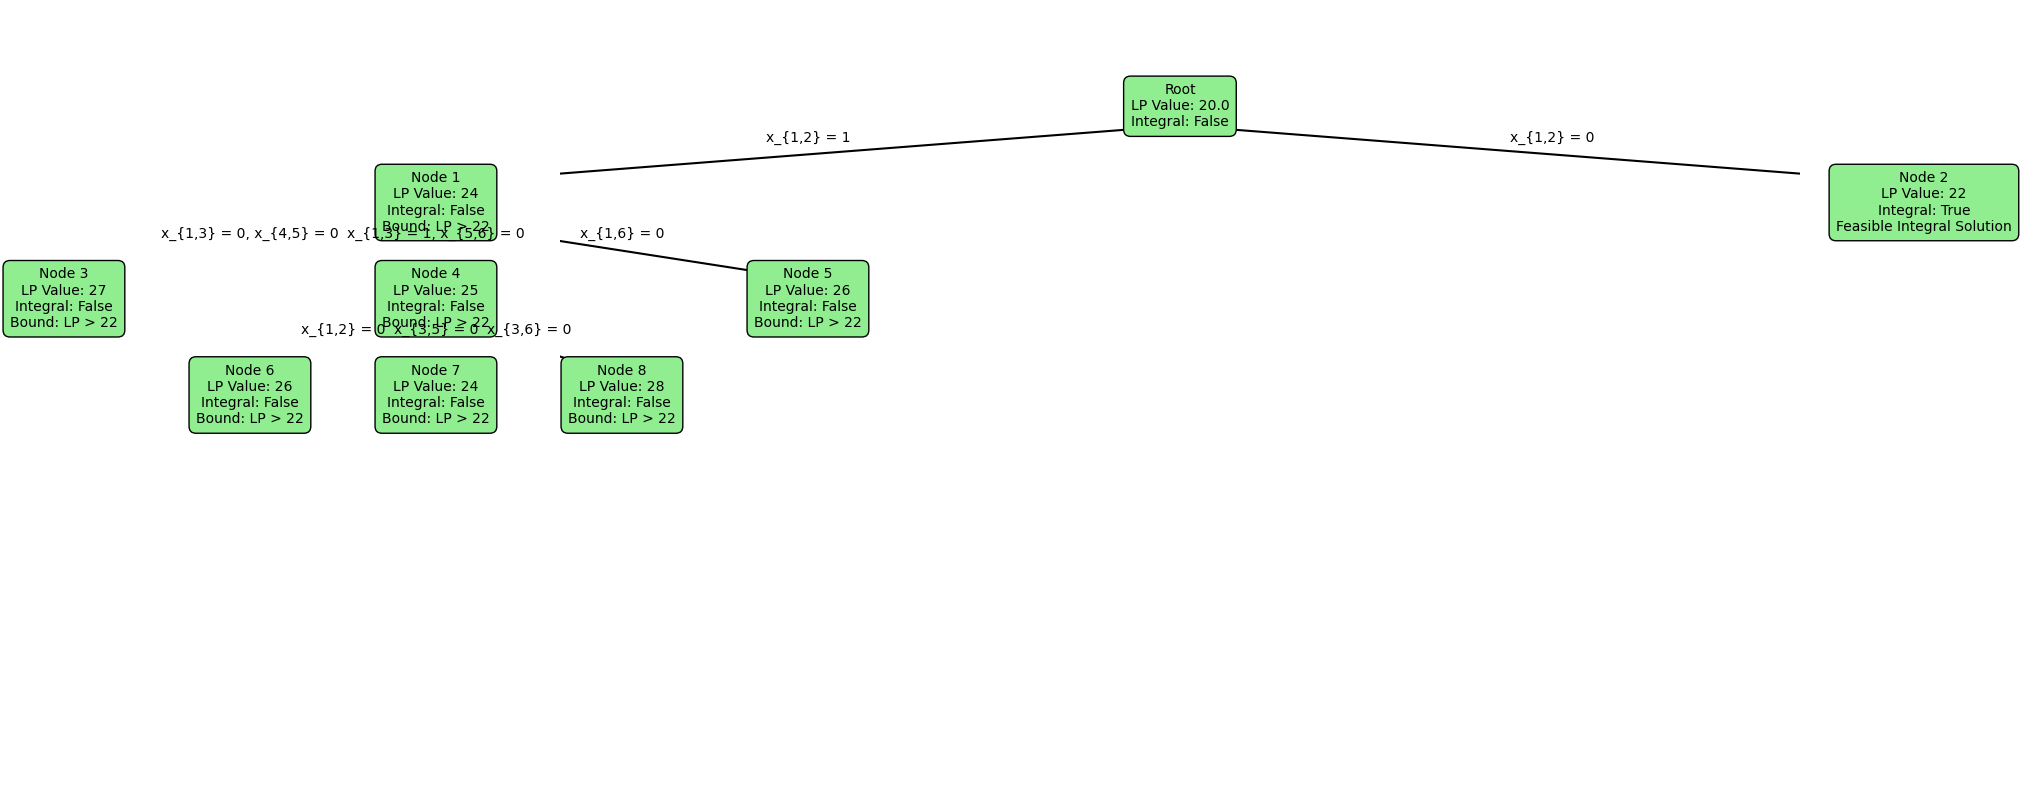

In [7]:
# adjust the plot to make it wider and ensure that all text is visible
fig, ax = plt.subplots(figsize=(16, 10))  # increase the width to make the graph less narrow

# plot the root node with more horizontal space
plot_node(root_node, x=0.5, y=3, dx=0.6)  # increase dx for more horizontal spacing between nodes

# adjust plot limits and hide axes
ax.set_xlim(0, 1)
ax.set_ylim(-4, 4)
ax.axis('off')

# display the updated plot
plt.show()

---
## Subtour Constraints

**(b) (5 marks)**

**(b.i)** Implement a routine in PuLP that solves a TSP-LP relaxation problem that includes *subtour constraints*.

Specifically, your routine should take as

**inputs:**

- a list of `cities`,
- a distance dictionary `dist`,
- a list of subtours `subtours`,

and **output** the solution to the following linear program:

$$
\begin{array}{crcll}
\min &\sum_{i<j} c_{ij}x_{ij}  \\
\text{subject to}
& \sum_{j<i}x_{ji} + \sum_{i<j}x_{ij} & = 2 &\text{ for each city }i\\
& \sum_{i<j, i\in S, j \notin S} x_{ij} + \sum_{i<j, i\notin S, j \in S} x_{ij}& \ge 2 & \text{ for subtour }S\in {\tt subtours}\\
& x_{ij}\text{'s} & \ge 0\\
\end{array}
$$

**Notes**:
- <font color='red'>You are **NOT** to set the variable category to `cat='Integer'` nor  `cat='Binary'`.</font>
- Your routine should return the value `20` for the following instance.

In [8]:
# define the list of cities
cities = [1,2,3,4,5,6]

# define the distances between each pair of cities
dist = {
               (1,2): 4, (1,3): 3,  (1,4): 7, (1,5): 7, (1,6): 6,
    (2,1): 4,            (2,3): 2,  (2,4): 5, (2,5): 7, (2,6): 7,
    (3,1): 3,  (3,2): 2,            (3,4): 8, (3,5): 6, (3,6): 6,
    (4,1): 7,  (4,2): 5, (4,3): 8,            (4,5): 3, (4,6): 5,
    (5,1): 7,  (5,2): 7, (5,3): 6,  (5,4): 3,           (5,6): 3, 
    (6,1): 6,  (6,2): 7, (6,3): 6,  (6,4): 5, (6,5): 3,
}

# define the list of subtours (each subtour is a list of cities)
subtours = [ 
    [1,2,6] 
 ]

In [9]:
# create a linear programming problem instance with the objective to minimise
prob2 = pulp.LpProblem("b(i)", pulp.LpMinimize)

# create decision variables x_{i,j} for each pair of cities where i < j
# Variables are continuous between 0 and 1 since it's an LP relaxation.
x = {
    (i, j): pulp.LpVariable(name=f"x_{i}_{j}", lowBound=0, upBound=1)
    for i in cities for j in cities if i < j
}

# objective function: minimise the total distance traveled
prob2 += pulp.lpSum(dist[i, j] * x[i, j] for (i, j) in x), "Total_Distance"

# Degree constraints: Each city must have exactly two edges (degree of 2).
for i in cities:
    prob2 += (
        pulp.lpSum(x[min(i, j), max(i, j)] for j in cities if j != i)
    ) == 2, f"Degree_{i}"

# subtour elimination constraints
for subset in subtours:
    S = subset
    # Sum over edges within the subtour S
    prob2 += (
        pulp.lpSum(x[i, j] for i in S for j in S if i < j)
    ) <= len(S) - 1, f"Subtour_Constraint_{S}"

# solve the LP problem using the default solver
prob2.solve()

# retrieve and print the optimal value of the objective function
optimal_value = pulp.value(prob2.objective)
print("Optimal value:", optimal_value)

Optimal value: 20.0


In [10]:
# retrieve and print the variables that are equal to 1 in the optimal solution
print("Optimal solution:")
for var in prob2.variables():
    if var.varValue == 1:
        print(var.name, "=", var.varValue)

Optimal solution:
x_1_2 = 1.0
x_1_3 = 1.0
x_2_3 = 1.0
x_4_5 = 1.0
x_4_6 = 1.0
x_5_6 = 1.0


**(b.ii)** Using the routine in (b.i), introduce a set of subtour constraints to solve the following TSP instance on six cities.

**Notes**:
- <font color='red'>You are **not** to set the variable category to `cat='Integer'`  nor  `cat='Binary'`.</font>
- To demonstrate your solution, you only need to *display the final set of subtour constraints*.
- You need **not** automate the process of finding subtour constraints.
- The shortest TSP tour has length 22.

In [11]:
cities = [1,2,3,4,5,6]
dist = {
               (1,2): 4, (1,3): 3,  (1,4): 7, (1,5): 7, (1,6): 6,
    (2,1): 4,            (2,3): 2,  (2,4): 5, (2,5): 7, (2,6): 7,
    (3,1): 3,  (3,2): 2,            (3,4): 8, (3,5): 6, (3,6): 6,
    (4,1): 7,  (4,2): 5, (4,3): 8,            (4,5): 3, (4,6): 5,
    (5,1): 7,  (5,2): 7, (5,3): 6,  (5,4): 3,           (5,6): 3,
    (6,1): 6,  (6,2): 7, (6,3): 6,  (6,4): 5, (6,5): 3,
}

import pulp

# WRITE YOUR CODE HERE
subtours = [
    [1,2,3]
 ]

prob22=pulp.LpProblem("b(i)",pulp.LpMinimize)

x = { (i, j): pulp.LpVariable(name=f"x_{i}_{j}", lowBound=0, upBound=1) for i in cities for j in cities if i != j }

prob22+=pulp.lpSum(dist[i]*x[i] for i in dist)

for i in cities:
    prob22+=pulp.lpSum(x[(j,i)] for j in cities if j<i)+pulp.lpSum(x[(i,j)] for j in cities if j>i)==2

for subset in subtours:
    S=set(subset)
    S_comp=set(cities)-S
    prob22+=pulp.lpSum(x[i,j] for i in S for j in S_comp)+pulp.lpSum(x[i,j] for i in S_comp for j in S)>=2

prob22.solve()
optimal_value=pulp.value(prob22.objective)
print("Optimal value:",optimal_value)

Optimal value: 22.0


In [12]:
print("Optimal solution:")
for var in prob22.variables():
    if var.varValue == 1:
        print(var.name, "=", var.varValue)

Optimal solution:
x_1_3 = 1.0
x_1_6 = 1.0
x_2_3 = 1.0
x_2_4 = 1.0
x_4_5 = 1.0
x_5_6 = 1.0


----

**(c) (9 marks)**

For the given TSP instance pf 80 cities, let $L^*$ be the length of a shortest TSP tour.

Using an appropriate combination of routines in (a) and (b), obtain upper bound $L_2$ and lower bound $L_1$ for $L^*$. In other words, $L_1\le L^*\le L_2$.


### Submission Details

In your submission, you have to include the following.
 - Clearly <font color='blue'>state the values of $L_1$ (lower bound) and $L_2$ (upper bound)</font>.
 - Provide the routines you used to find $L_1$ and $L_2$ (note: you do not need to automate all procedures). I will run the routines locally on my machine.
 - Prepare a short video (maximum 10 minutes) explaining your solution. In the video, you should:
    - (i) Justify the lower bound $L_1$, briefly explaining the subtour constraints used and/or the branch-and-bound tree (details given below), and
    - (ii) Justify the upper bound $L_2$.
   Please **share the link in this notebook**. <font color = 'red'>DO NOT SEND ME THE VIDEO FILE</font>. You may supplement your explanation with the pictures, slides, or any written notes in this notebook.



### Scoring Criteria


Marks will be awarded based on:

-**(I)** the quality of your estimates, or equivalently, **the ratio** $L_2/L_1$.  The specific mark allocation for **TSP C** is as follows.

| Ratio $R=L_2/L_1$   |  Mark(s)    |
|:-------------------|:-----------:|
| $R>1.5$&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp;| 0|
| $1.1 < R \le 1.5$   | 2 |
| $1.01 < R \le 1.1$  | 4 |
| $R \le 1.001$       | 6 |

-**(II)** the quality of your explanation.

### Notes
- <font color='red'>In your routines, you are **NOT** to set the variable category to `cat='Integer'` nor  `cat='Binary'`.</font>
- To justify <font color='blue'>the lower bound $L_1$</font>, you should use a Branch-and-Bound tree and / or certain subtour constraints. Specifically, in your solution, you must:
    - state the subtour constraints used;
    - display the (possibly incomplete) Branch-and-Bound tree with the necessary node information and branch labels. _You can plot using `Pyplot`, simple drawing software (eg. like powerpoint), or simply draw by hand._ You can supplement your diagram with the steps to build the tree.
    - You are allowed to use a combination of techniques as long as it is justified.
- To justify <font color='blue'>the upper bound $L_2$</font>, you simply need to provide a TSP tour. To find a good tour, you may
    - use a valid TSP (if you find one);
    - or simply, guess. :)

------------------
# Your Solution

<font color = 'blue'>$$L_1 = 1526 \text { and } L_2 = 1526~\text{(CHANGETHIS!)}$$</font>

<font color = 'blue'>Video Link: https://drive.google.com/file/d/1F5DpctYJQUp-Qz_frScMdisgZc639Jc_/view?usp=drive_link</font>




----------------

### TSP Instance C

Please put your routines here!

In [13]:
# Question C

from TSP_C_2024 import *
from TSP_plot import * # SOME CUSTOM FUNCTIONS FOR TSP
import pulp as pulp
import random

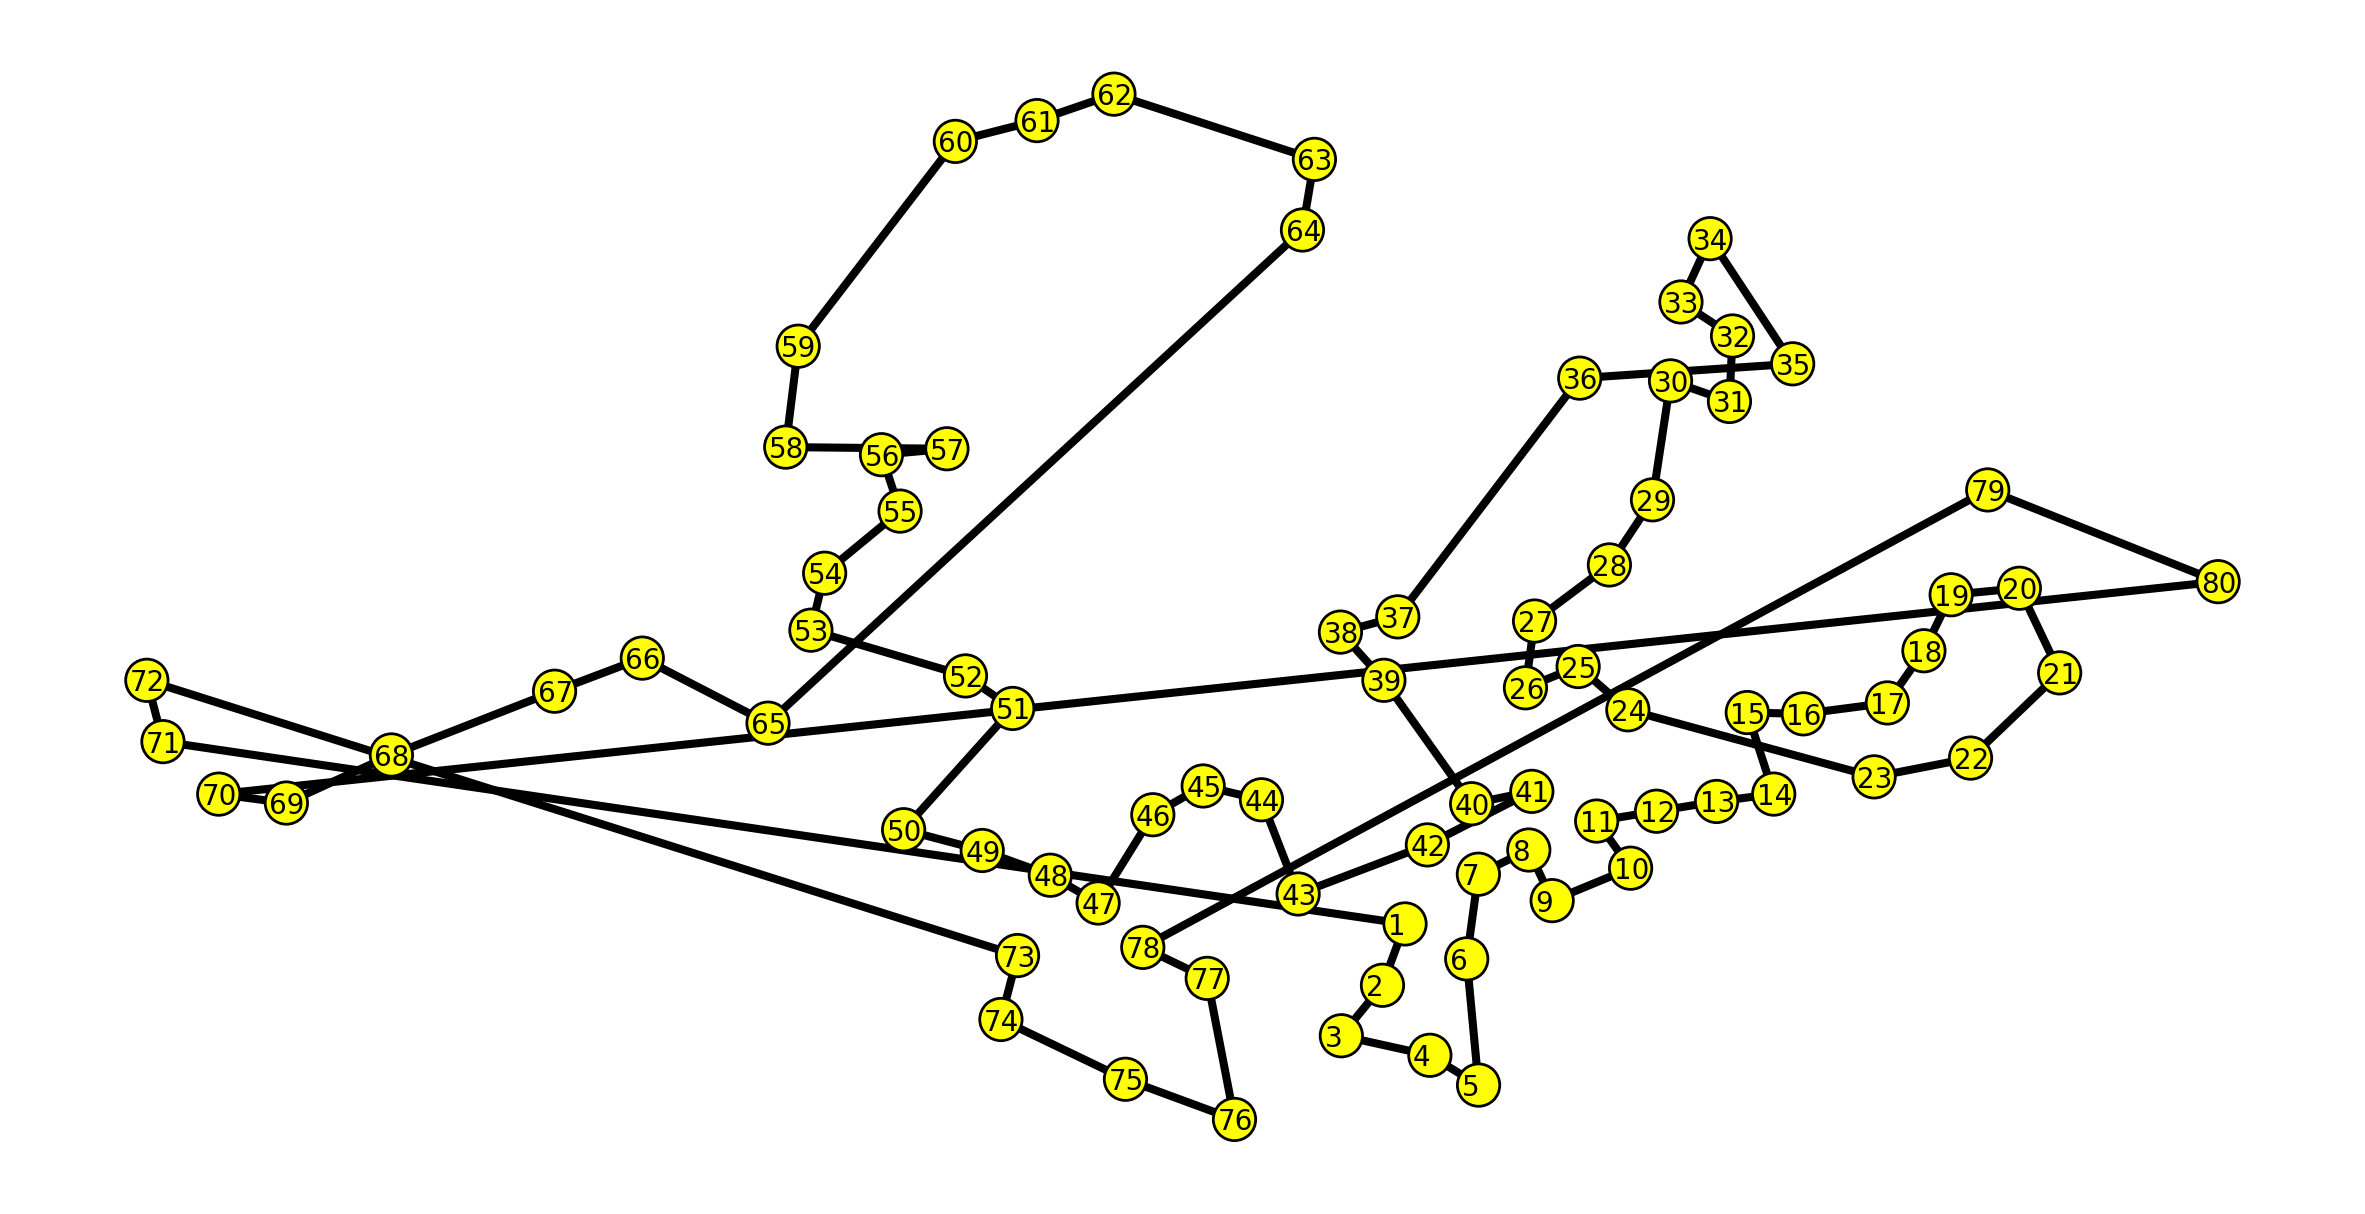

length of candidate TSP tour : 2487


In [14]:
# you can change this tour

candidate_tour = [
     1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
    11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
    21, 22, 23, 24, 25, 26, 27, 28, 29, 30,
    31, 32, 33, 34, 35, 36, 37, 38, 39, 40,
    41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
    51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
    61, 62, 63, 64, 65, 66, 67, 68, 69, 70,
    #71, 72, 73, 74, 75, 76, 77, 78, 79, 80,
    80, 79, 78, 77, 76, 75, 74, 73, 72, 71,
]

# auxiliary function that plots out a candidate TSP tour 
#                     and computes its length

L2 = TSP_plot(candidate_tour,cities_C,posn_C,dist_C)

print("length of candidate TSP tour : {}".format(L2))


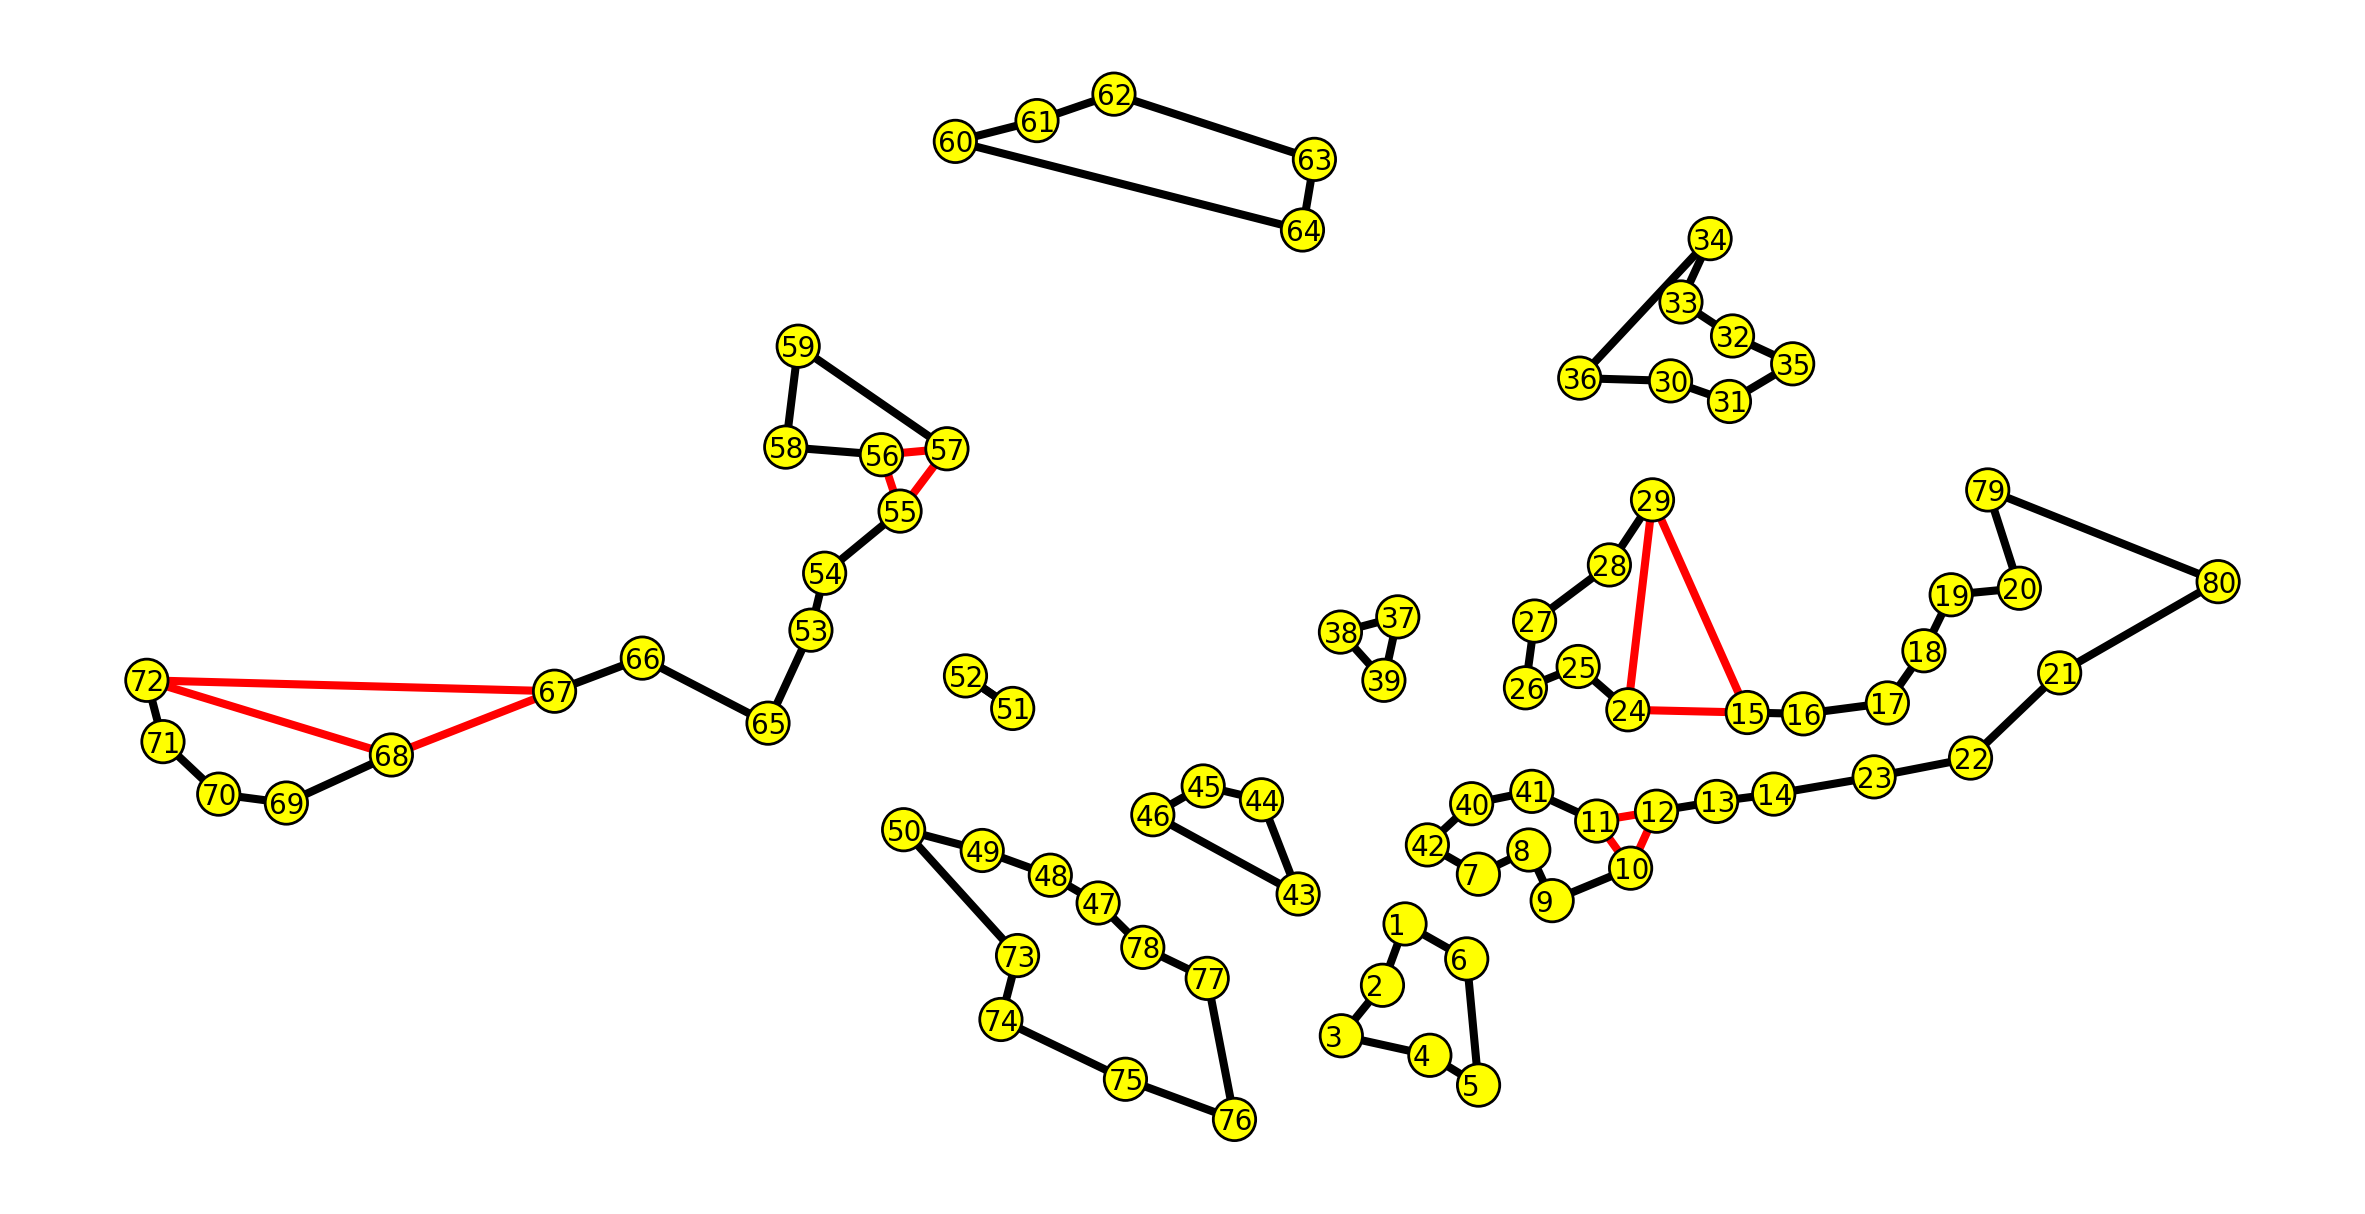

length of fractional TSP tour : 1427.5
NOTE! NOT ALL FRACTIONAL TSP TOURS GIVE A VALID LOWER BOUND!


In [15]:
# auxiliary function that plots out a fractional TSP tour 
#   E  : list of edges with values one, and plotted in black 
#   fE : list of edges with fractional values, and plotted in red 


E = [
    (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6,1),
    (43, 44), (44, 45), (45, 46), (46, 43),
    (47, 48), (48, 49), (49, 50), (50,73), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (78,47),
    (51,52), (52,51),
    (68, 69), (69, 70), (70, 71), (71, 72), 
    (53, 54), (54, 55), (53,65), (65, 66), (66, 67), 
    (56,58), (58,59), (59,57),
    (60, 61), (61, 62), (62, 63), (63, 64), (64,60),
    (37, 38), (38, 39), (39,37),
    (7, 8), (8, 9), (9, 10), (7,42), (42,40), (40,41), (41,11),
    (30, 31), (31, 35), (35, 32), (32, 33), (33, 34), (34, 36), (36,30), 
    (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), 
    (12, 13), (13, 14), (14,23), (23,22), (22,21), (21,80),
    (80, 79), (79,20), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), 
]

fE = [
    (67,68),(68,72),(67,72),
    (55, 56), (56, 57), (57,55),
    (10, 11), (11, 12), (12,10),
    (15, 24), (24, 29), (29,15),
    
]

LL = frac_TSP_plot(E,fE,cities_C,posn_C,dist_C)

print("length of fractional TSP tour : {}".format(LL))
print("NOTE! NOT ALL FRACTIONAL TSP TOURS GIVE A VALID LOWER BOUND!")

In [16]:
# There are 80 cities
num=80

# Now, set up the LP relaxation to find a lower bound L1
cities = list(range(1, num + 1))  # List of cities from 1 to 80

# Create the LP problem instance
prob = pulp.LpProblem("TSP_LP_Relaxation", pulp.LpMinimize)

# Create decision variables x_{i,j} for i < j
x = {
    (i, j): pulp.LpVariable(name=f"x_{i}_{j}", lowBound=0, upBound=1)
    for i in cities for j in cities if i < j
}

# Objective function: Minimize the total distance
prob += pulp.lpSum(dist_C[i, j] * x[i, j] for (i, j) in x), "Total_Distance"

# Degree constraints: Each city must have degree 2 or (2 path)
for i in cities:
    prob += (
        pulp.lpSum(x[min(i, j), max(i, j)] for j in cities if j != i)
    ) == 2, f"Degree_{i}"

# Solve the LP relaxation
prob.solve()

optimal_value=pulp.value(prob.objective)
print("Optimal value:",optimal_value)

#print("Optimal solution:")
#for var in prob.variables():
    #if var.varValue == 1:
        #print(var.name, "=", var.varValue)

is_integral = all(var.varValue in [0, 1] for var in prob.variables()) #check variable whether is integer
print(is_integral)

Optimal value: 1385.5
False


1. **Cities and Decision Variables**: 
   - The algorithm considers 80 cities, represented as `cities = list(range(1, num + 1))`. 
   - For every pair of cities `(i, j)`, a decision variable `x[i, j]` is created that can take values between 0 and 1, indicating whether a path is used between cities `i` and `j` in the solution.
2. **Objective Function (Minimization of Distance)**:
   - The goal is to minimize the total distance traveled
3. **Degree Constraints**:
   - A key constraint is that every city must have exactly two connections (degree = 2), ensuring that the city is visited and exited once
4. **LP Relaxation**:
   - In the LP relaxation, the binary constraints of TSP are relaxed, allowing variables `x[i, j]` to take fractional values between 0 and 1 instead of being strictly 0 or 1. This helps in finding a lower bound for the solution (referred to as `L1`)
5. **Output**:
   - The LP relaxation provides an optimal value for the objective function (the total minimized distance) and checks if the relaxed solution can directly be used for the original problem.
.  

In [17]:
from collections import defaultdict
def get_solution_graph(variables):
    graph = defaultdict(list)
    for var in variables:
        if var.varValue > 1e-6:
            # Extract city indices from variable name
            i, j = map(int, var.name.split('_')[1:])
            graph[i].append(j)
            graph[j].append(i)
    return graph

def find_subtours(graph):
    visited = set()
    subtours = []

    for city in graph:
        if city not in visited:
            stack = [city]
            subtour = []
            while stack:
                node = stack.pop()
                if node not in visited:
                    visited.add(node)
                    subtour.append(node)
                    stack.extend(graph[node])
            subtours.append(subtour)
    return subtours

variables = [var for var in prob.variables() if var.varValue > 1e-6]
graph = get_solution_graph(variables)
all_subtours = find_subtours(graph)
print(all_subtours)

[[10, 9, 8, 41, 40, 42, 7, 11, 12, 13, 14, 16, 15, 24, 25, 26, 27, 28, 29, 36, 30, 31, 35, 34, 33, 32], [17, 23, 22, 21, 80, 20, 79, 19, 18], [1, 6, 5, 4, 3, 76, 77, 78, 47, 48, 73, 74, 75, 49, 51, 52, 50, 46, 45, 44, 43, 2], [37, 39, 38], [53, 65, 66, 67, 68, 69, 72, 71, 70, 54, 58, 59, 60, 61, 64, 63, 62], [55, 57, 56]]


2. **find_subtours(graph)**:
   - This function uses **Depth-First Search (DFS)** to detect subtours in the graph. A subtour is a smaller loop that doesn't include all cities.
   - The algorithm checks if each city has been visited. If not, it starts a DFS from that city, adding nodes to a `subtour` list until all reachable cities are visited.
   - The function returns a list of all detected subtours (each represented as a list of cities).


In [18]:
is_integral = all(var.varValue in [0, 1] for var in prob.variables())


    # Manually add subtour constraints
subtours = [
    [10, 9, 8, 41, 40, 42, 7, 11, 12, 13, 14, 16, 15, 24, 25, 26, 27, 28, 29, 36, 30, 31, 35, 34, 33, 32], [17, 23, 22, 21, 80, 20, 79, 19, 18], [1, 6, 5, 4, 3, 76, 77, 78, 47, 48, 73, 74, 75, 49, 51, 52, 50, 46, 45, 44, 43, 2], [37, 39, 38], [53, 65, 66, 67, 68, 69, 72, 71, 70, 54, 58, 59, 60, 61, 64, 63, 62], [55, 57, 56]
        # Add more subtours as identified
]

    # Add subtour elimination constraints
for S in subtours:
    prob += (
        pulp.lpSum(x[min(i, j), max(i, j)] for i in S for j in S if i < j)
    ) <= len(S) - 1, f"Subtour_Constraint_{S}"

    # Re-solve the LP problem
prob.solve()

    # Update the lower bound
L1 = pulp.value(prob.objective)
print(f"Updated lower bound L1: {L1}")

Updated lower bound L1: 1423.0


In [19]:
is_integral = all(var.varValue in [0, 1] for var in prob.variables())
print(is_integral)
for var in prob.variables():
    if var.varValue >0 and var.varValue!=1:
        print(var.name, "=", var.varValue)

False
x_32_34 = 0.5
x_32_35 = 0.5
x_34_35 = 0.5
x_69_70 = 0.5
x_69_72 = 0.5
x_70_72 = 0.5


[[10, 9, 8, 41, 40, 42, 7, 11, 12, 13, 14, 16, 15, 24, 25, 26, 27, 28, 29, 36, 30, 31, 35, 34, 33, 32], [17, 23, 22, 21, 80, 20, 79, 19, 18], [1, 6, 5, 4, 3, 76, 77, 78, 47, 48, 73, 74, 75, 49, 51, 52, 50, 46, 45, 44, 43, 2], [37, 39, 38], [53, 65, 66, 67, 68, 69, 72, 71, 70, 54, 58, 59, 60, 61, 64, 63, 62], [55, 57, 56]]
From the tour path, we can see 32,34,35 are in the main tour,69,70,72 are in the shorter tour.Because TSP optimal solution has only one tour involving all the cities with the shortest distance, all except the main tour are considered as subtours. Then below we repeat this step to optimize the tour. It is important to note We also can confirm some constraint between cities.

In [20]:
# Constraint: The edge between city 69 and city 70 must be included in the solution (set to 1)
prob+=x[(69,70)]==1
# Constraint: The edge between city 69 and city 72 must not be included in the solution (set to 0)
prob+=x[(69,72)]==0
# Constraint: The edge between city 70 and city 72 must not be included in the solution (set to 0)
prob+=x[(70,72)]==0
prob.solve()
optimal_value=pulp.value(prob.objective)
print("Optimal value:",optimal_value)

Optimal value: 1442.0


In [21]:
for var in prob.variables():
    if var.varValue >0 and var.varValue!=1:
        print(var.name, "=", var.varValue)

x_32_34 = 0.5
x_32_35 = 0.5
x_34_35 = 0.5
x_61_62 = 0.5
x_61_64 = 0.5
x_62_64 = 0.5


In [22]:
prob+=x[(61,62)]==1
prob+=x[(61,64)]==0
prob+=x[(62,64)]==0
prob.solve()
optimal_value=pulp.value(prob.objective)
print("Optimal value:",optimal_value)
for var in prob.variables():
    if var.varValue >0 and var.varValue!=1:
        print(var.name, "=", var.varValue)

Optimal value: 1442.0
x_32_34 = 0.5
x_32_35 = 0.5
x_34_35 = 0.5
x_54_55 = 0.5
x_54_58 = 0.5
x_55_58 = 0.5


In [23]:
prob+=x[(54,55)]==1
prob+=x[(54,58)]==0
prob+=x[(55,58)]==0
prob.solve()
optimal_value=pulp.value(prob.objective)
print("Optimal value:",optimal_value)
for var in prob.variables():
    if var.varValue >0 and var.varValue!=1:
        print(var.name, "=", var.varValue)

Optimal value: 1443.5
x_32_34 = 0.5
x_32_35 = 0.5
x_34_35 = 0.5
x_56_57 = 0.5
x_56_59 = 0.5
x_57_59 = 0.5


In [24]:
prob+=x[(56,57)]==1
prob+=x[(56,59)]==0
prob+=x[(57,59)]==0
prob.solve()
optimal_value=pulp.value(prob.objective)
print("Optimal value:",optimal_value)
for var in prob.variables():
    if var.varValue >0 and var.varValue!=1:
        print(var.name, "=", var.varValue)

Optimal value: 1448.0


In [25]:
variables = [var for var in prob.variables() if var.varValue > 1e-6]
graph = get_solution_graph(variables)
all_subtours = find_subtours(graph)
print(all_subtours)

[[10, 12, 13, 14, 23, 22, 21, 80, 20, 79, 19, 18, 17, 16, 15, 24, 25, 26, 39, 38, 37, 27, 28, 29, 36, 64, 63, 62, 61, 60, 59, 58, 56, 57, 55, 54, 53, 52, 51, 50, 49, 48, 73, 74, 75, 76, 3, 2, 4, 5, 6, 1, 42, 40, 41, 11], [30, 33, 34, 32, 35, 31], [43, 77, 78, 47, 46, 45, 44], [65, 67, 66], [68, 72, 71, 70, 69], [7, 9, 8]]


In [26]:
is_integral = all(var.varValue in [0, 1] for var in prob.variables())


    # Manually add subtour constraints
subtours = [
    [10, 12, 13, 14, 23, 22, 21, 80, 20, 79, 19, 18, 17, 16, 15, 24, 25, 26, 39, 38, 37, 27, 28, 29, 36, 64, 63, 62, 61, 60, 59, 58, 56, 57, 55, 54, 53, 52, 51, 50, 49, 48, 73, 74, 75, 76, 3, 2, 4, 5, 6, 1, 42, 40, 41, 11], [30, 33, 34, 32, 35, 31], [43, 77, 78, 47, 46, 45, 44], [65, 67, 66], [68, 72, 71, 70, 69], [7, 9, 8]
]

    # Add subtour elimination constraints
for S in subtours:
    prob += (
        pulp.lpSum(x[min(i, j), max(i, j)] for i in S for j in S if i < j)
    ) <= len(S) - 1, f"Subtour_Constraint_{S}"

    # Re-solve the LP problem
prob.solve()

    # Update the lower bound
L1 = pulp.value(prob.objective)
print(f"Updated lower bound L1: {L1}")

Updated lower bound L1: 1486.0


In [27]:
is_integral = all(var.varValue in [0, 1] for var in prob.variables())
print(is_integral)
for var in prob.variables():
    if var.varValue >0 and var.varValue!=1:
        print(var.name, "=", var.varValue)

False
x_10_12 = 0.5
x_11_12 = 0.5
x_11_41 = 0.5
x_1_2 = 0.5
x_1_43 = 0.5
x_2_4 = 0.5
x_3_4 = 0.5
x_3_76 = 0.5
x_43_77 = 0.5
x_46_47 = 0.5
x_46_51 = 0.5
x_47_48 = 0.5
x_48_49 = 0.5
x_49_51 = 0.5
x_66_67 = 0.5
x_66_72 = 0.5
x_67_72 = 0.5
x_76_77 = 0.5
x_7_8 = 0.5
x_7_9 = 0.5
x_8_41 = 0.5
x_9_10 = 0.5


False indicates there are still some between 0-1

In [28]:
prob+=x[(66,67)]==1
prob+=x[(67,72)]==1
prob+=x[(66,72)]==0
prob.solve()
optimal_value=pulp.value(prob.objective)
print("Optimal value:",optimal_value)
for var in prob.variables():
    if var.varValue >0 and var.varValue!=1:
        print(var.name, "=", var.varValue)

Optimal value: 1492.0
x_29_30 = 0.5
x_29_31 = 0.5
x_30_31 = 0.5
x_32_34 = 0.5
x_32_35 = 0.5
x_34_35 = 0.5


In [29]:
prob+=x[(29,31)]==1
prob+=x[(29,30)]==0
prob+=x[(30,31)]==0
prob.solve()
optimal_value=pulp.value(prob.objective)
print("Optimal value:",optimal_value)
for var in prob.variables():
    if var.varValue >0 and var.varValue!=1:
        print(var.name, "=", var.varValue)

Optimal value: 1492.0


In [30]:
variables = [var for var in prob.variables() if var.varValue > 1e-6]
graph = get_solution_graph(variables)
all_subtours = find_subtours(graph)
print(all_subtours)

[[10, 12, 13, 14, 23, 22, 21, 80, 20, 79, 19, 18, 17, 16, 15, 24, 25, 26, 39, 38, 37, 27, 28, 29, 31, 35, 32, 34, 33, 30, 36, 64, 63, 62, 61, 60, 59, 58, 56, 57, 55, 54, 53, 65, 52, 51, 50, 49, 48, 73, 74, 75, 76, 77, 78, 47, 46, 45, 44, 43, 1, 2, 3, 4, 5, 6, 9, 8, 7, 42, 40, 41, 11], [66, 68, 69, 70, 71, 72, 67]]


In [31]:
is_integral = all(var.varValue in [0, 1] for var in prob.variables())


    # Manually add subtour constraints
subtours = [
    [10, 12, 13, 14, 23, 22, 21, 80, 20, 79, 19, 18, 17, 16, 15, 24, 25, 26, 39, 38, 37, 27, 28, 29, 31, 35, 32, 34, 33, 30, 36, 64, 63, 62, 61, 60, 59, 58, 56, 57, 55, 54, 53, 65, 52, 51, 50, 49, 48, 73, 74, 75, 76, 77, 78, 47, 46, 45, 44, 43, 1, 2, 3, 4, 5, 6, 9, 8, 7, 42, 40, 41, 11], [66, 68, 69, 70, 71, 72, 67]
]

    # Add subtour elimination constraints
for S in subtours:
    prob += (
        pulp.lpSum(x[min(i, j), max(i, j)] for i in S for j in S if i < j)
    ) <= len(S) - 1, f"Subtour_Constraint_{S}"

    # Re-solve the LP problem
prob.solve()

    # Update the lower bound
L1 = pulp.value(prob.objective)
print(f"Updated lower bound L1: {L1}")

Updated lower bound L1: 1512.0


In [32]:
is_integral = all(var.varValue in [0, 1] for var in prob.variables())
print(is_integral)
for var in prob.variables():
    if var.varValue >0 and var.varValue!=1:
        print(var.name, "=", var.varValue)

True


In [33]:
tour_path = []

for var in prob.variables():
    if var.varValue > 1e-6:
        var_name_parts = var.name.split('_')
        if len(var_name_parts) >= 3:
            var_index_1 = int(var_name_parts[1])
            var_index_2 = int(var_name_parts[2])
            tour_path.append((var_index_1, var_index_2))

print(tour_path)

[(10, 11), (10, 12), (11, 41), (12, 13), (13, 14), (14, 23), (15, 16), (15, 24), (16, 17), (17, 18), (18, 19), (19, 79), (1, 2), (1, 43), (20, 79), (20, 80), (21, 22), (21, 80), (22, 23), (24, 25), (25, 26), (26, 39), (27, 28), (27, 37), (28, 29), (29, 31), (2, 3), (30, 33), (30, 36), (31, 35), (32, 34), (32, 35), (33, 34), (36, 64), (37, 38), (38, 39), (3, 4), (40, 41), (40, 42), (43, 44), (44, 45), (45, 46), (46, 47), (47, 78), (48, 49), (48, 73), (49, 50), (4, 5), (50, 51), (51, 52), (52, 53), (53, 54), (54, 55), (55, 57), (56, 57), (56, 58), (58, 59), (59, 60), (5, 6), (60, 61), (61, 62), (62, 63), (63, 64), (65, 66), (65, 68), (66, 67), (67, 72), (68, 69), (69, 70), (6, 9), (70, 71), (71, 72), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (7, 42), (7, 8), (8, 9)]


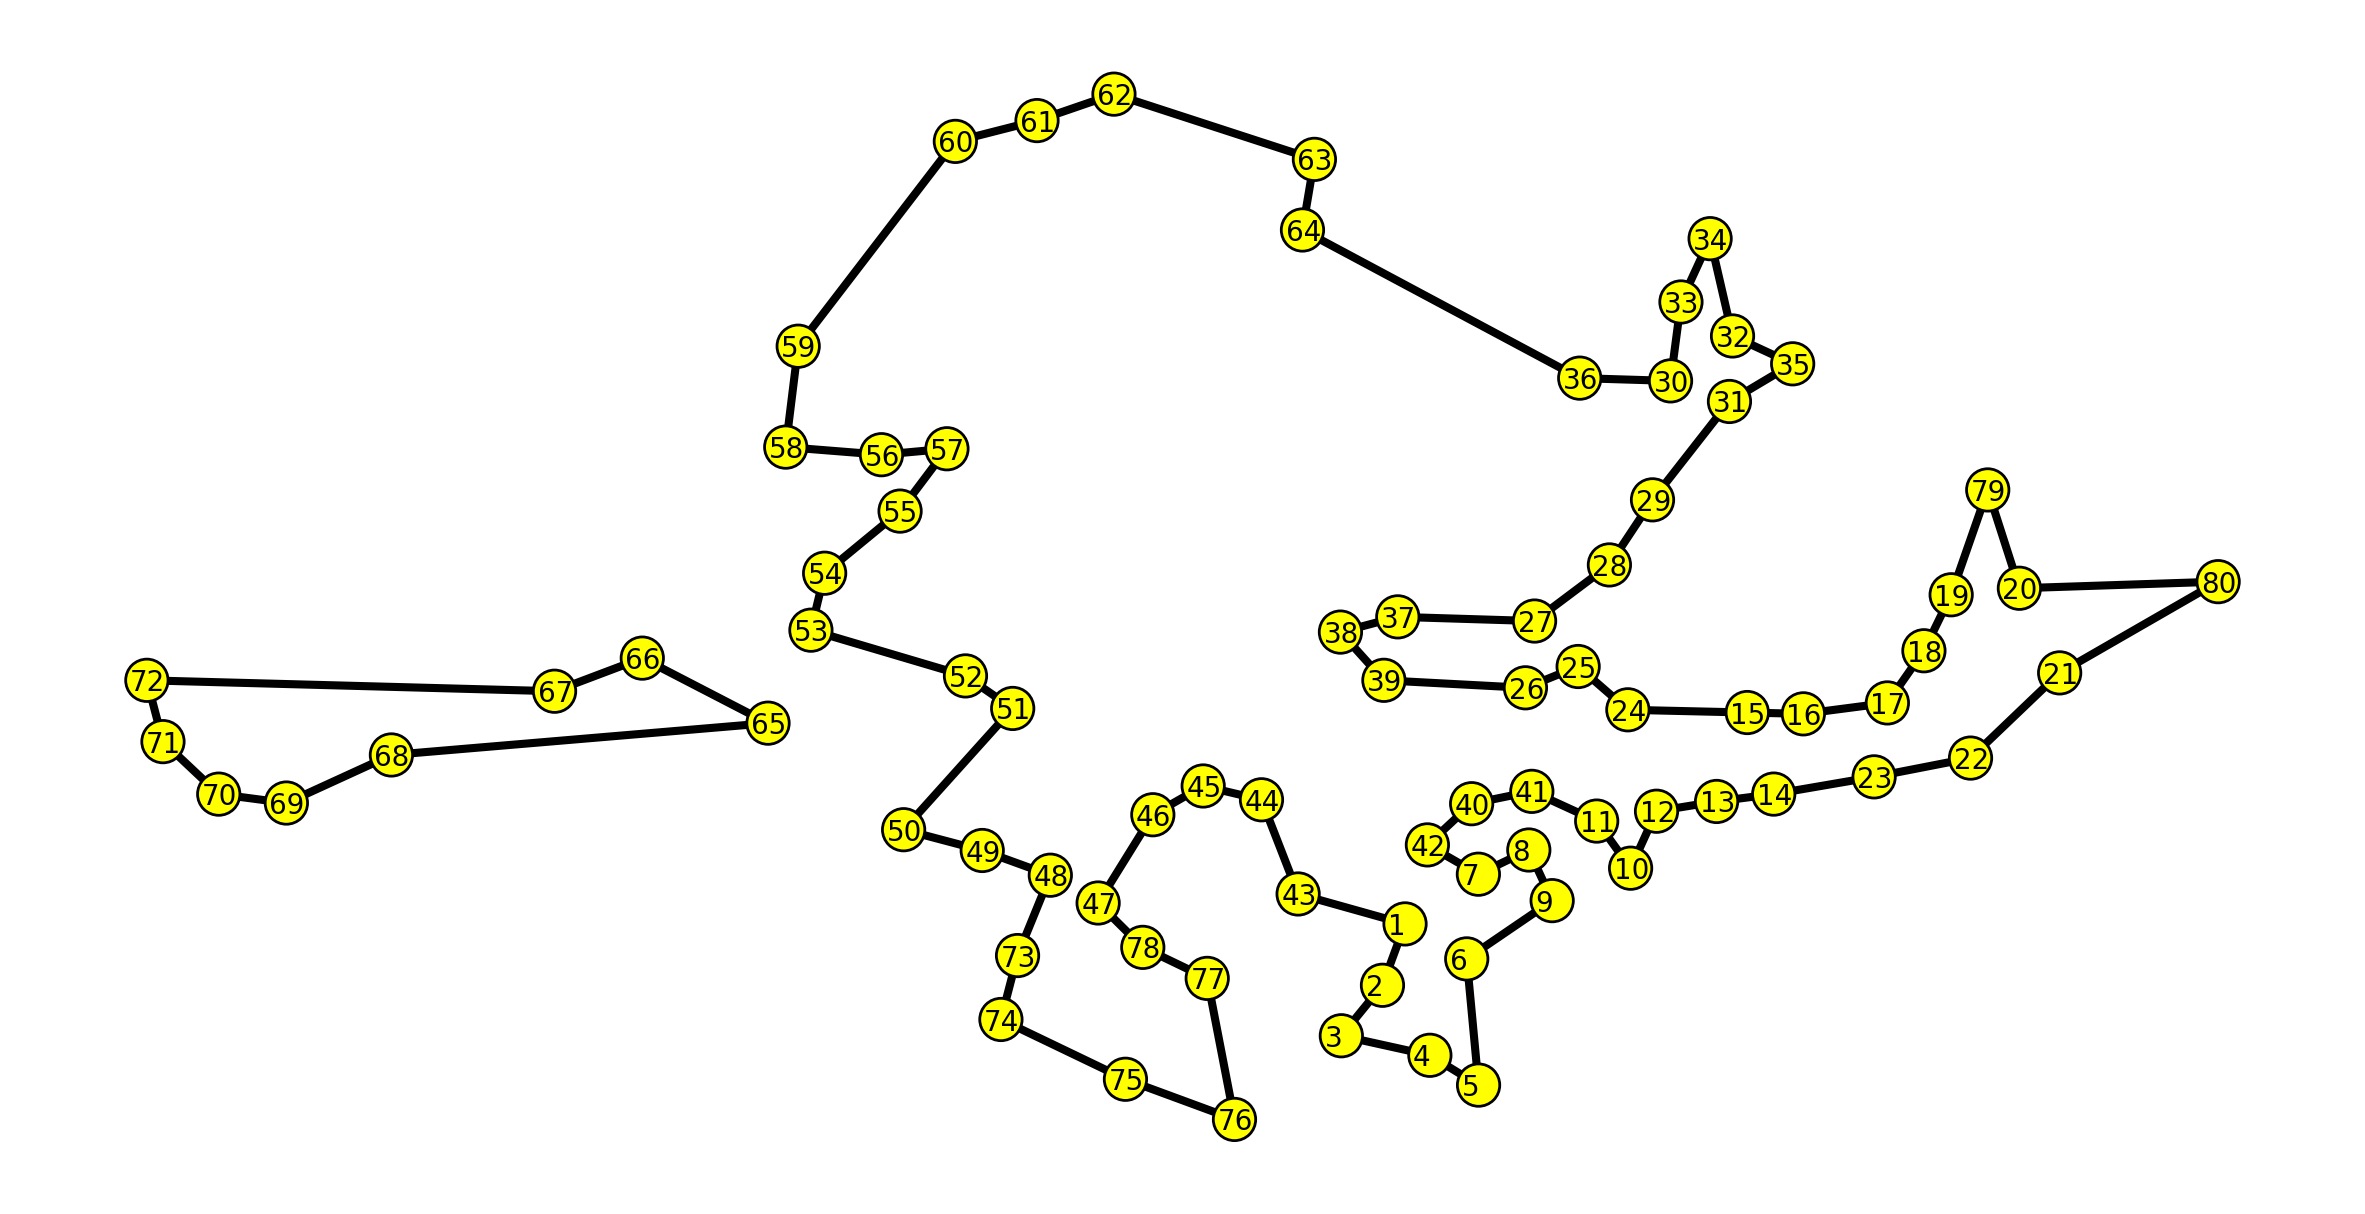

length of fractional TSP tour : 1512
NOTE! NOT ALL FRACTIONAL TSP TOURS GIVE A VALID LOWER BOUND!


In [34]:
# auxiliary function that plots out a fractional TSP tour
#   E  : list of edges with values one, and plotted in black
#   fE : list of edges with fractional values, and plotted in red


E = tour_path

fE = [
    ]

LL = frac_TSP_plot(E,fE,cities_C,posn_C,dist_C)

print("length of fractional TSP tour : {}".format(LL))
print("NOTE! NOT ALL FRACTIONAL TSP TOURS GIVE A VALID LOWER BOUND!")

While our algorithm did not recognize and detect any subtours, we were still found from the visualizing graph, so we had to manually remove the subtour[65,66,67,68,69,70,71,72].

In [35]:
is_integral = all(var.varValue in [0, 1] for var in prob.variables())

Rest_Subtour = [66, 65, 68, 69, 70, 71, 72, 67]
numbers = [num for num in range(1, 81) if num not in Rest_Subtour]

    # Manually add subtour constraints
subtours = [Rest_Subtour, numbers]

    # Add subtour elimination constraints
for S in subtours:
    prob += (
        pulp.lpSum(x[min(i, j), max(i, j)] for i in S for j in S if i < j)
    ) <= len(S) - 1

    # Re-solve the LP problem
prob.solve()

    # Update the lower bound
L1 = pulp.value(prob.objective)
print(f"Updated lower bound L1: {L1}")

Updated lower bound L1: 1526.0


In [36]:
optimal_path = []

for var in prob.variables():
    if var.varValue > 1e-6:
        var_name_parts = var.name.split('_')
        if len(var_name_parts) >= 3:
            var_index_1 = int(var_name_parts[1])
            var_index_2 = int(var_name_parts[2])
            optimal_path.append((var_index_1, var_index_2))

print(optimal_path)

[(10, 11), (10, 12), (11, 41), (12, 13), (13, 14), (14, 23), (15, 16), (15, 24), (16, 17), (17, 18), (18, 19), (19, 79), (1, 2), (1, 43), (20, 79), (20, 80), (21, 22), (21, 80), (22, 23), (24, 25), (25, 26), (26, 39), (27, 28), (27, 37), (28, 29), (29, 31), (2, 3), (30, 33), (30, 36), (31, 35), (32, 34), (32, 35), (33, 34), (36, 64), (37, 38), (38, 39), (3, 4), (40, 41), (40, 42), (43, 44), (44, 45), (45, 46), (46, 47), (47, 78), (48, 49), (48, 73), (49, 50), (4, 5), (50, 51), (51, 52), (52, 65), (53, 54), (53, 66), (54, 55), (55, 57), (56, 57), (56, 58), (58, 59), (59, 60), (5, 6), (60, 61), (61, 62), (62, 63), (63, 64), (65, 68), (66, 67), (67, 72), (68, 69), (69, 70), (6, 9), (70, 71), (71, 72), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (7, 42), (7, 8), (8, 9)]


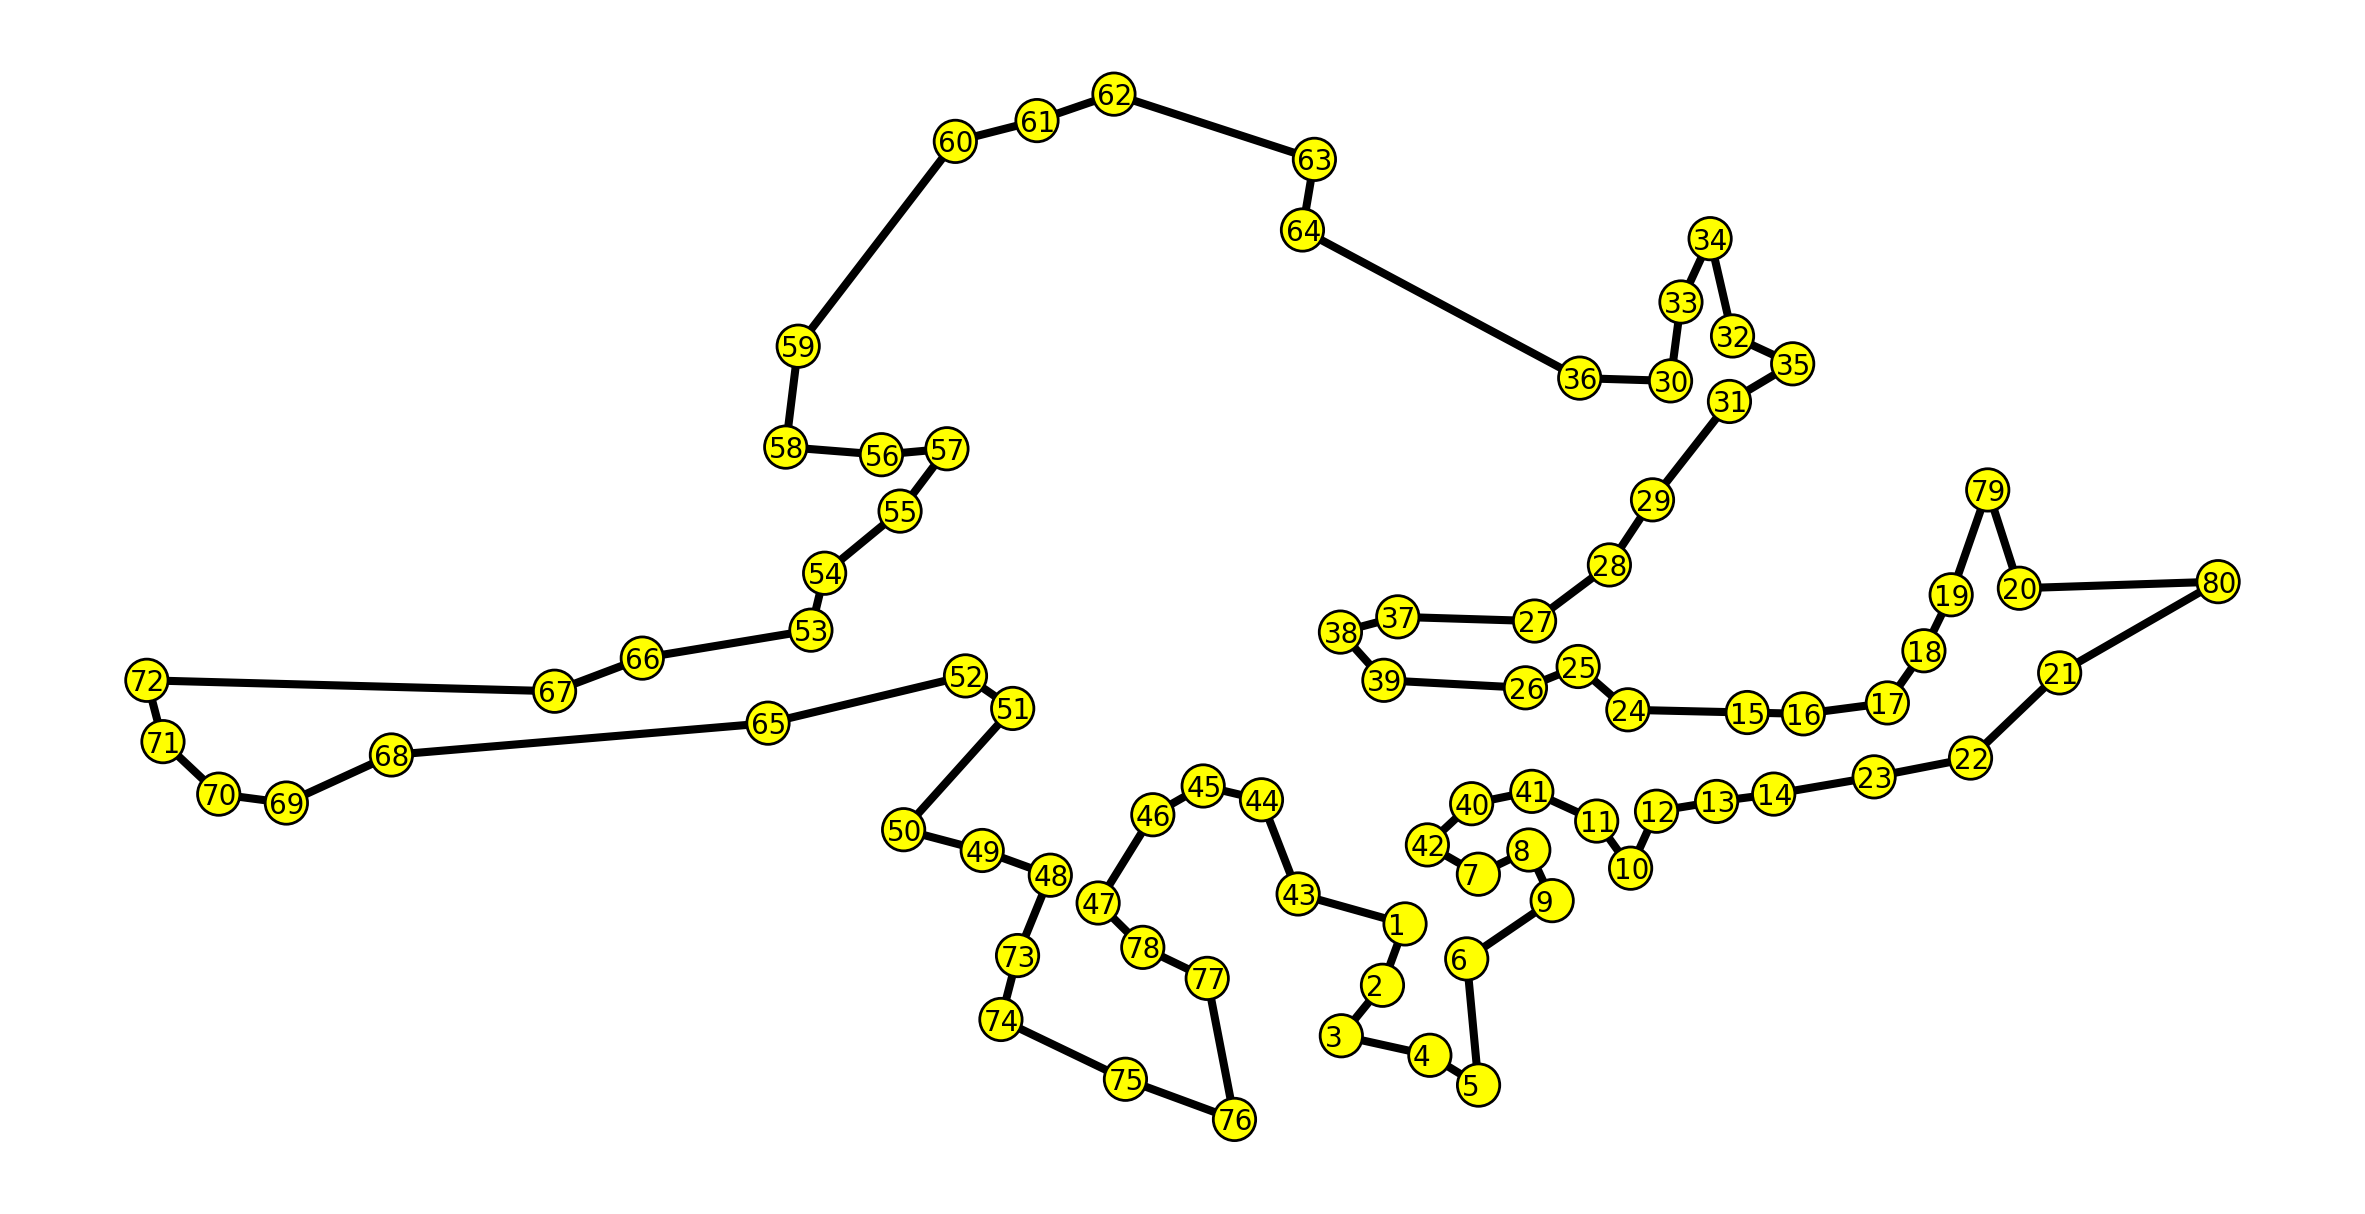

length of fractional TSP tour : 1526
NOTE! NOT ALL FRACTIONAL TSP TOURS GIVE A VALID LOWER BOUND!


In [37]:
# auxiliary function that plots out a fractional TSP tour
#   E  : list of edges with values one, and plotted in black
#   fE : list of edges with fractional values, and plotted in red


E = optimal_path

fE = [
    ]

LL = frac_TSP_plot(E,fE,cities_C,posn_C,dist_C)

print("length of fractional TSP tour : {}".format(LL))
print("NOTE! NOT ALL FRACTIONAL TSP TOURS GIVE A VALID LOWER BOUND!")

From the graph we can see the visualized solution is reasonable.There is no subtour. We believe this is true optimal solution 